# IBM Badge - Statistics

## Victor Hugo Negrisoli

### Desenvolvedor Full-Stack Pleno | Analista de Dados

### Séries temporais, média, mediana e outliers com Boxplot

Este notebook destina-se aos conteúdos desenvolvidos durante o curso Statistics 101 da IBM através da plataforma IBM Cognitive Class

# Sumário

1. [Importando e descrevendo os dados](#Importando-e-descrevendo-os-dados)
    1. [Configurações de gráficos da Matplotlib](#Configurações-de-gráficos-da-Matplotlib)
    2. [Função para filtrar dados por ano](#Função-para-filtrar-dados-por-ano)
2. [Visualizando séries temporais](#Visualizando-séries-temporais)
3. [Média, mediana e outliers com Boxplot](#Média,-mediana-e-outliers-com-Boxplot)

### Importando e descrevendo os dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
dados = pd.read_csv('dados/US_starts_v12.csv')

In [6]:
dados.head(10)

,Date,Starts,unemp_rate,Median_new_home_price,datevar,t,month,year,f_price
0,01/01/1963,1244,5.7,17200,36,1,1,1963,
1,02/01/1963,1456,5.9,17700,37,2,2,1963,16761.423828125
2,03/01/1963,1534,5.7,18200,38,3,3,1963,14654.1689453125
3,04/01/1963,1689,5.7,18200,39,4,4,1963,17702.33203125
4,05/01/1963,1641,5.9,17500,40,5,5,1963,15311.609375
5,06/01/1963,1588,5.6,18000,41,6,6,1963,16189.0693359375
6,07/01/1963,1614,5.6,18400,42,7,7,1963,15137.427734375
7,08/01/1963,1639,5.4,17800,43,8,8,1963,16376.5322265625
8,09/01/1963,1763,5.5,17900,44,9,9,1963,15763.45703125
9,10/01/1963,1779,5.5,17600,45,10,10,1963,16768.45703125


In [7]:
dados.tail(10)

,Date,Starts,unemp_rate,Median_new_home_price,datevar,t,month,year,f_price
607,08/01/2013,885,7.2,255300,643,608,8,2013,260776.28125
608,09/01/2013,863,7.2,269800,644,609,9,2013,254287.890625
609,10/01/2013,936,7.2,264300,645,610,10,2013,268722.1875
610,11/01/2013,1105,7.0,277100,646,611,11,2013,263761.8125
611,12/01/2013,1034,6.7,275500,647,612,12,2013,275556.5
612,01/01/2014,897,6.6,269800,648,613,1,2014,272769.15625
613,02/01/2014,928,6.7,268400,649,614,2,2014,269708.65625
614,03/01/2014,950,6.7,285400,650,615,3,2014,265829.46875
615,04/01/2014,1071,6.3,269700,651,616,4,2014,284265.375
616,05/01/2014,1001,6.3,282000,652,617,5,2014,267233


### Configurações de gráficos da Matplotlib

In [116]:
def configurar_plot(x, y, titulo, altura, largura):
    plt.title(titulo)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.gcf().set_size_inches(altura, largura)
    plt.show()

### Função para filtrar dados por ano

In [117]:
def filtrar_dados_por_ano(ano):
    return dados[dados['year'] == ano]

Plot inicial de uma série temporal, vamos ver a média de novos preços de casas pelas datas.

1. Primeiramente, iremos agrupar nosso dataset pela data e pela média do preço do ano de 1963

In [118]:
dados_1963 = filtrar_dados_por_ano(1963)
dados_1963.tail(10)

,Date,Starts,unemp_rate,Median_new_home_price,datevar,t,month,year,f_price
2,03/01/1963,1534,5.7,18200,38,3,3,1963,14654.1689453125
3,04/01/1963,1689,5.7,18200,39,4,4,1963,17702.33203125
4,05/01/1963,1641,5.9,17500,40,5,5,1963,15311.609375
5,06/01/1963,1588,5.6,18000,41,6,6,1963,16189.0693359375
6,07/01/1963,1614,5.6,18400,42,7,7,1963,15137.427734375
7,08/01/1963,1639,5.4,17800,43,8,8,1963,16376.5322265625
8,09/01/1963,1763,5.5,17900,44,9,9,1963,15763.45703125
9,10/01/1963,1779,5.5,17600,45,10,10,1963,16768.45703125
10,11/01/1963,1622,5.7,18400,46,11,11,1963,16657.556640625
11,12/01/1963,1491,5.5,18700,47,12,12,1963,17261.154296875


In [119]:
agrupado_data_1963 = dados_1963.groupby('Date').mean().sort_values(by = 'Date').head(20)
agrupado_data_1963.head()

,Starts,unemp_rate,Median_new_home_price,datevar,t,month,year
Date,,,,,,,
01/01/1963,1244,5.7,17200,36,1,1,1963
02/01/1963,1456,5.9,17700,37,2,2,1963
03/01/1963,1534,5.7,18200,38,3,3,1963
04/01/1963,1689,5.7,18200,39,4,4,1963
05/01/1963,1641,5.9,17500,40,5,5,1963


### Visualizando séries temporais

Plotando séries temporais diretamente através da Matplotlib com o PyPlot

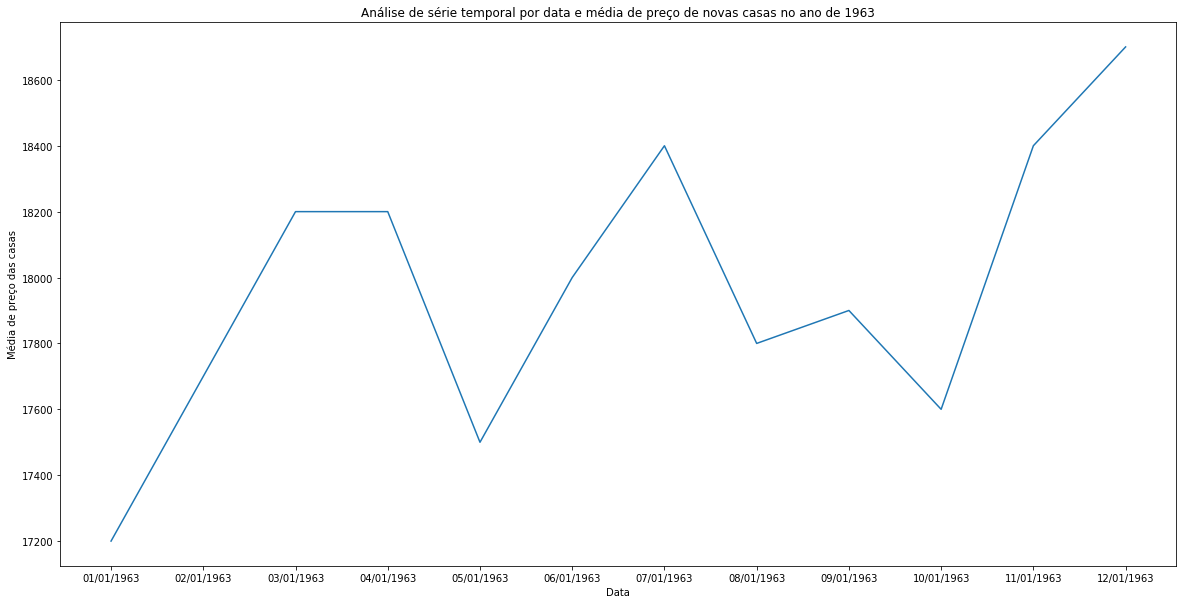

In [120]:
plt.plot(agrupado_data_1963.index.to_numpy(), agrupado_data_1963['Median_new_home_price'])

configurar_plot(
    'Data',
    'Média de preço das casas', 
    'Análise de série temporal por data e média de preço de novas casas no ano de 1963',
    20,
    10
)

Plotando diretamente com a Matplotlib presente na biblioteca Pandas com o método plot() da classe DataFrame

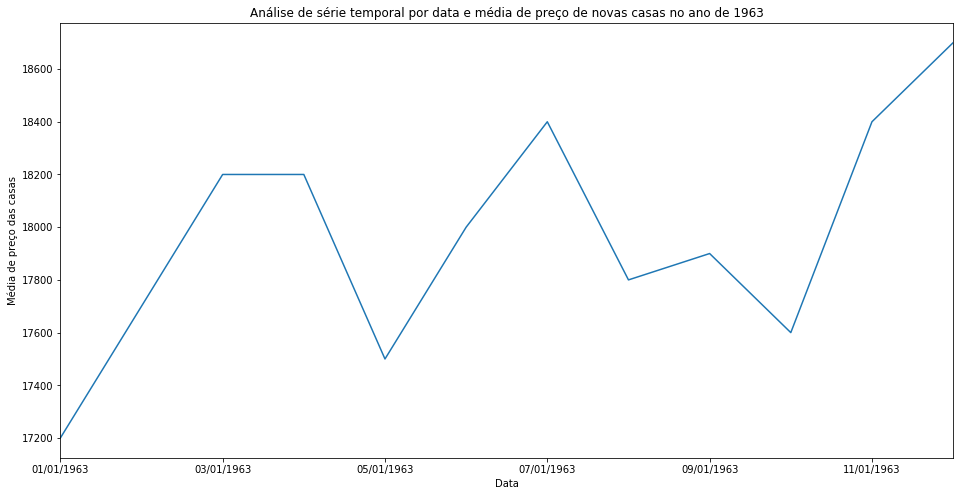

In [121]:
agrupado_data_1963['Median_new_home_price'].plot()

configurar_plot(
    'Data',
    'Média de preço das casas', 
    'Análise de série temporal por data e média de preço de novas casas no ano de 1963',
    16,
    8
)

Agora iremos analisar como foi alterada a média por anos

In [122]:
agrupado_data = dados.groupby('year').mean()
agrupado_data.head()

,Starts,unemp_rate,Median_new_home_price,datevar,t,month
year,,,,,,
1963,1588.333333,5.641667,17966.666667,41.5,6.5,6.5
1964,1540.416667,5.158333,18983.333333,53.5,18.5,6.5
1965,1469.333333,4.508333,20150.000000,65.5,30.5,6.5
1966,1166.500000,3.791667,21525.000000,77.5,42.5,6.5
1967,1284.833333,3.841667,22691.666667,89.5,54.5,6.5


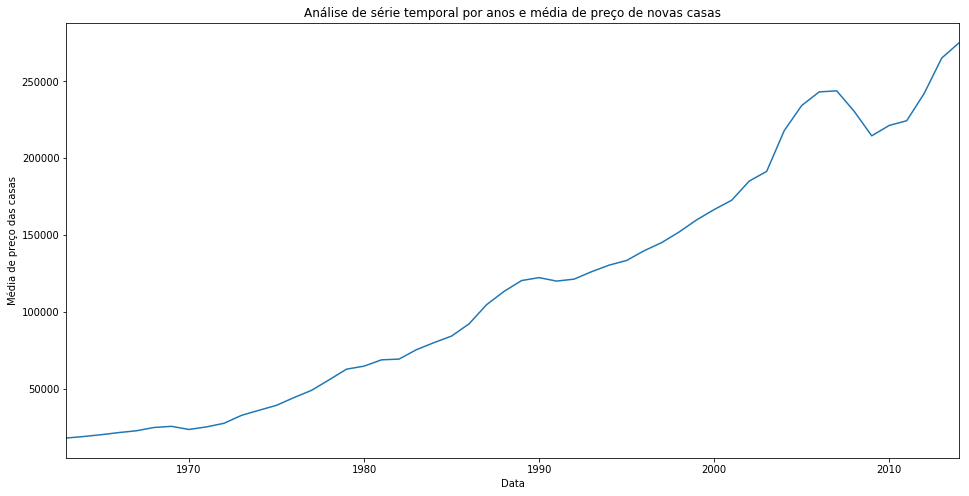

In [123]:
agrupado_data['Median_new_home_price'].plot()

configurar_plot(
    'Data',
    'Média de preço das casas', 
    'Análise de série temporal por anos e média de preço de novas casas',
    16,
    8
)

Agora, vamos verificar a diferença entre a média e o desvio padrão

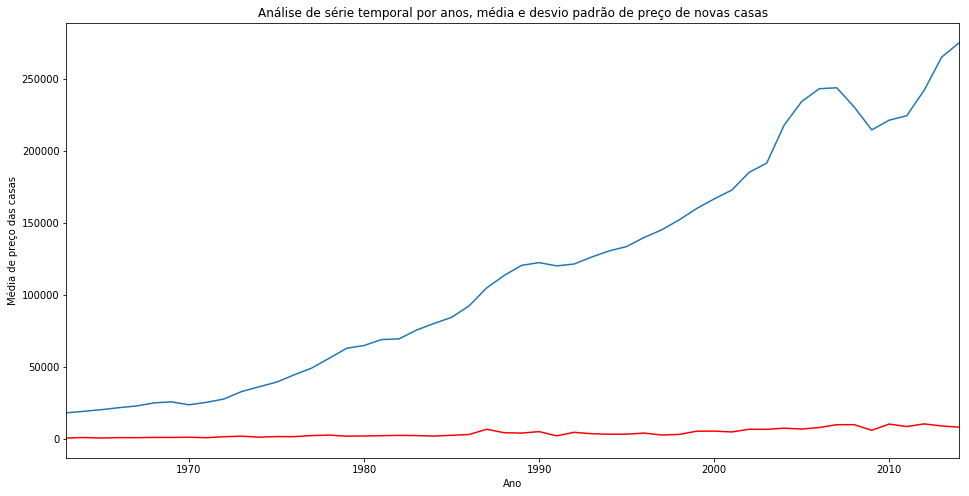

In [124]:
agrupado_data_std = dados.groupby('year').std()
ax = agrupado_data_std['Median_new_home_price'].plot(color = 'r')
agrupado_data['Median_new_home_price'].plot(ax = ax)

configurar_plot(
    'Ano',
    'Média de preço das casas', 
    'Análise de série temporal por anos, média e desvio padrão de preço de novas casas',
    16,
    8
)

Agora iremos agrupar por meses no ano de 2010 e analisar a média das casas

In [152]:
analise_mensal_2010 = filtrar_dados_por_ano(2010)[['Median_new_home_price', 'month']].groupby('month').mean()
analise_mensal_2010.head(15)

,Median_new_home_price
month,
1,218200
2,221900
3,224800
4,208300
5,230500
6,219500
7,212100
8,226600
9,228000


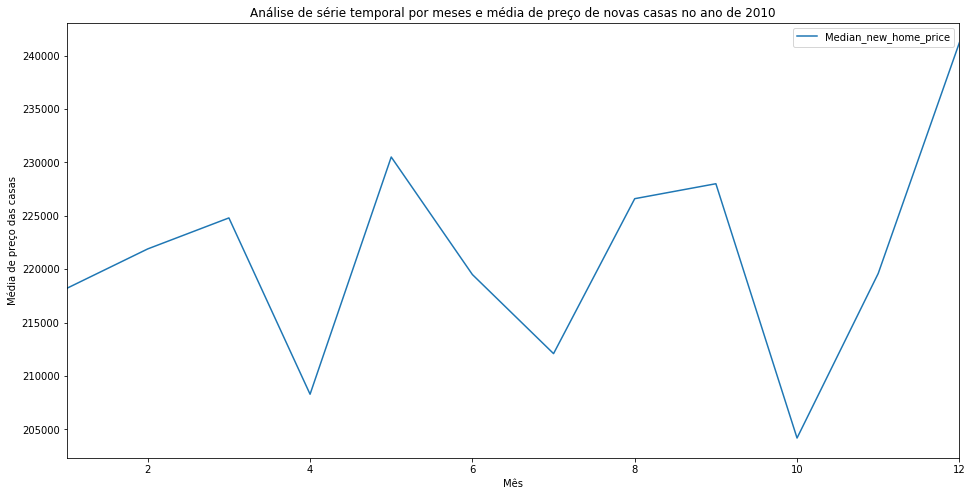

In [153]:
analise_mensal_2010.plot()

configurar_plot(
    'Mês',
    'Média de preço das casas', 
    'Análise de série temporal por meses e média de preço de novas casas no ano de 2010',
    16,
    8
)

### Média, mediana e outliers com Boxplot

Vamos filtrar o dataset para o ano de 2000

In [168]:
analise_2000 = filtrar_dados_por_ano(2000)
analise_2000

,Date,Starts,unemp_rate,Median_new_home_price,datevar,t,month,year,f_price
444,01/01/2000,1636,4.0,163500,480,445,1,2000,164761.796875
445,02/01/2000,1737,4.1,162400,481,446,2,2000,165804.703125
446,03/01/2000,1604,4.0,165100,482,447,3,2000,162205.3125
447,04/01/2000,1626,3.8,162600,483,448,4,2000,167305.171875
448,05/01/2000,1575,4.0,164700,484,449,5,2000,162582.96875
449,06/01/2000,1559,4.0,160100,485,450,6,2000,166071.6875
450,07/01/2000,1463,4.0,169000,486,451,7,2000,160263.828125
451,08/01/2000,1541,4.1,166600,487,452,8,2000,169429.953125
452,09/01/2000,1507,3.9,171500,488,453,9,2000,167138.21875
453,10/01/2000,1549,3.9,176300,489,454,10,2000,172619.65625


Em seguida, iremos plotar um Boxplot da média de preços de novas casas para o ano de 2000.

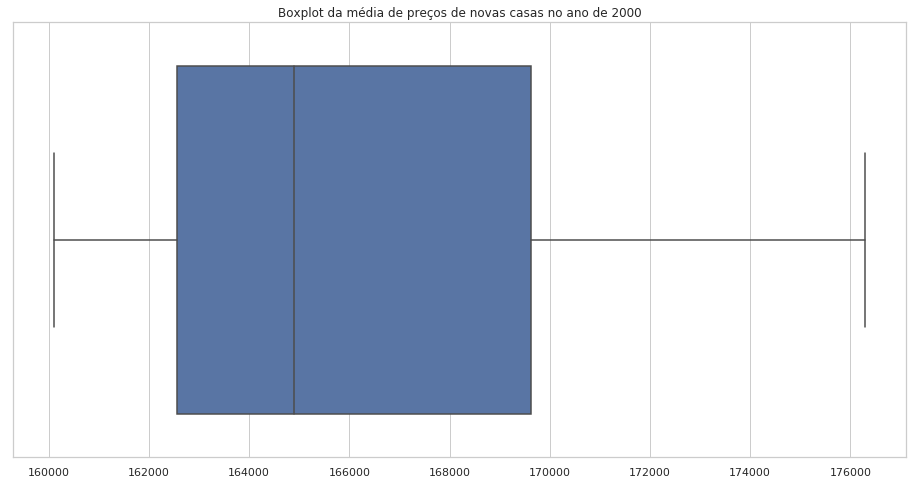

In [180]:
sns.set(style = "whitegrid")
sns.boxplot("Median_new_home_price", data = analise_2000)

configurar_plot(
    '',
    '', 
    'Boxplot da média de preços de novas casas no ano de 2000',
    16,
    8
)

Na próxima análise, iremos plotar para os dados do valor inicial do valor das casas.

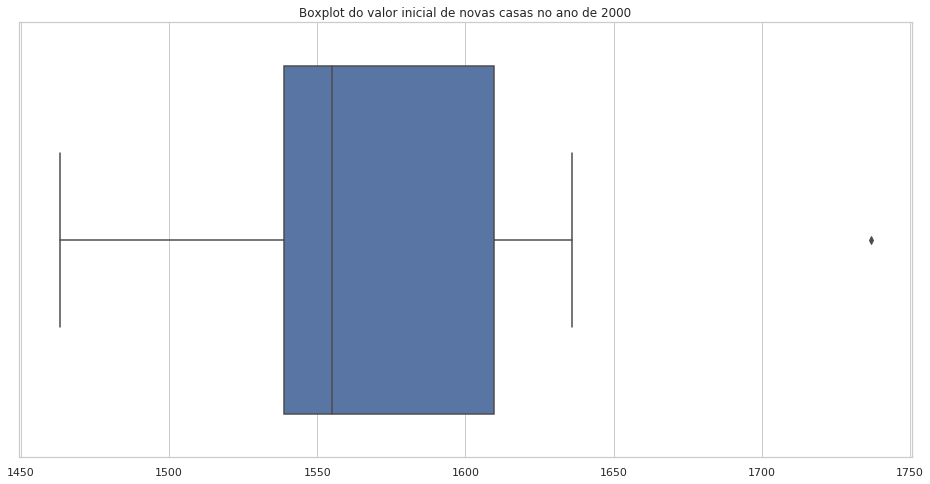

In [181]:
sns.set(style="whitegrid")
sns.boxplot("Starts", hue = analise_mensal_2010.index, data=analise_2000)

configurar_plot(
    '',
    '', 
    'Boxplot do valor inicial de novas casas no ano de 2000',
    16,
    8
)

O Dataset de avaliação de professores utilizado nos notebooks anteriores é muito mais apropriado para o uso de Boxplots devido à disponibilização de algumas variáveis binárias, vamos importá-lo então.

In [182]:
dados_professores = pd.read_csv('dados/teacherratings.csv')
dados_professores.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


Aqui iremos plotar um Boxplot analisando o total de estudantes destacando por gênero.

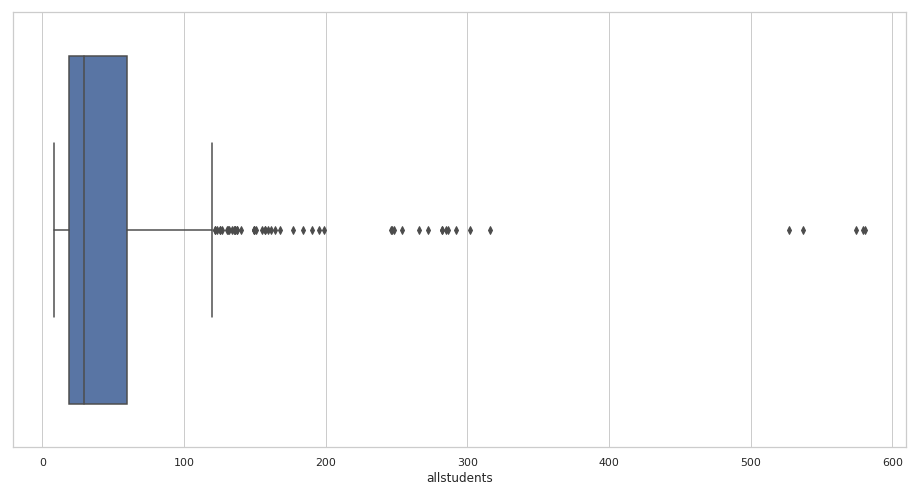

In [206]:
sns.set(style="whitegrid")
sns.boxplot('allstudents', data = dados_professores)

plt.gcf().set_size_inches(16, 8)

Agora iremos plotar um Boxplot analisando o total de estudantes dividido por gênero, e destacando quais são nativos ou não.

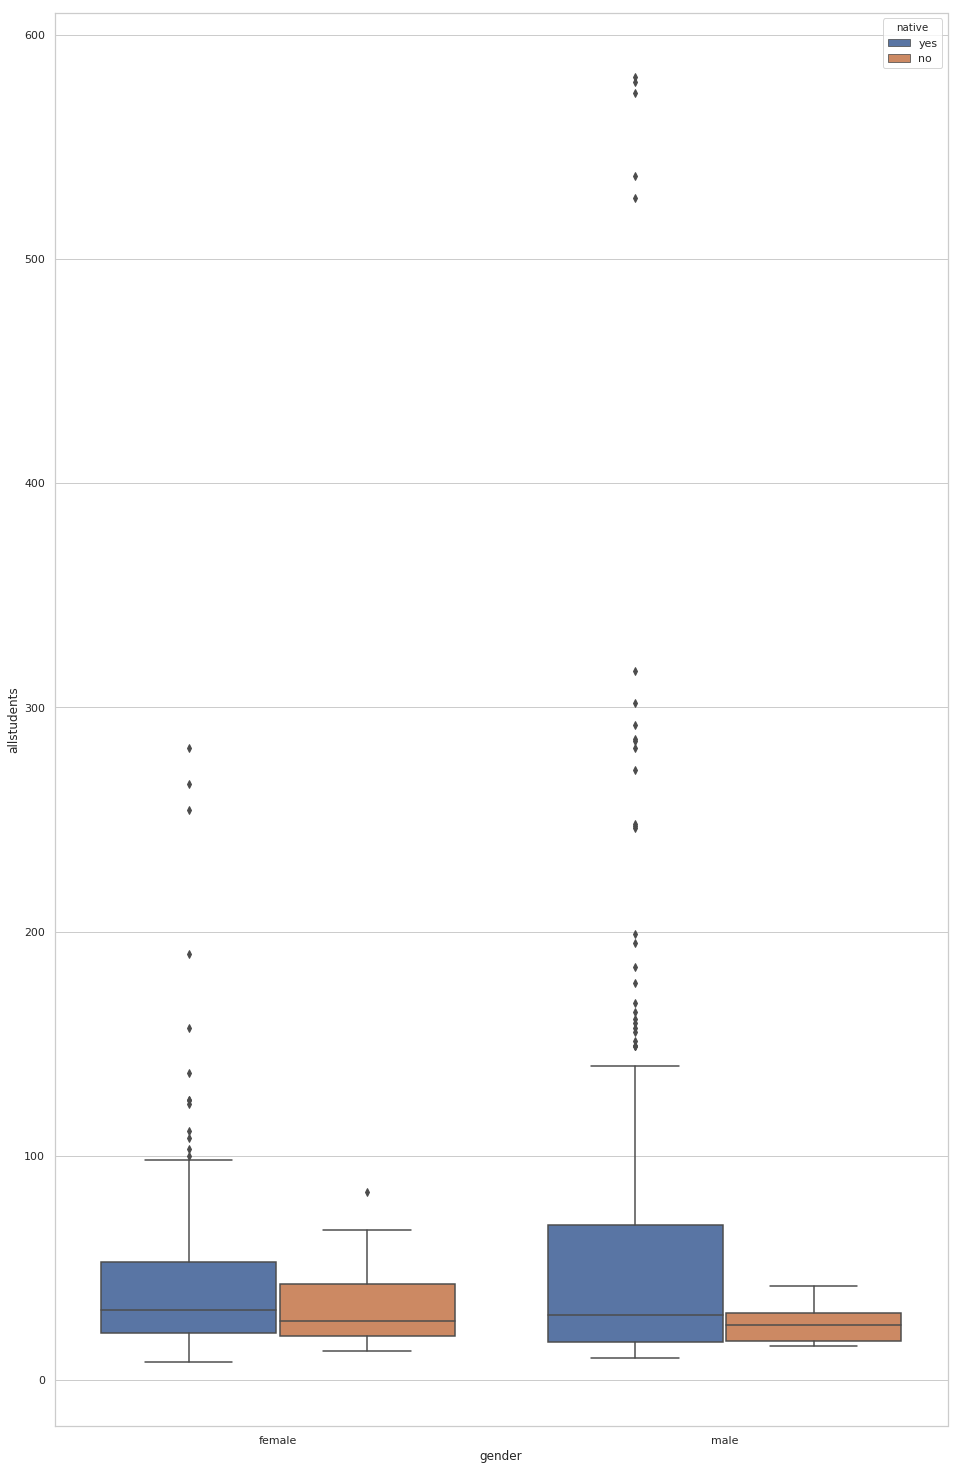

In [207]:
sns.set(style="whitegrid")
sns.boxplot(x = "gender", y = 'allstudents', hue = 'native', data = dados_professores)

plt.gcf().set_size_inches(16, 26)

Por fim, vamos plotar um Boxplot avaliando a beleza diferenciando por gênero e destacando por professor de origem nativa

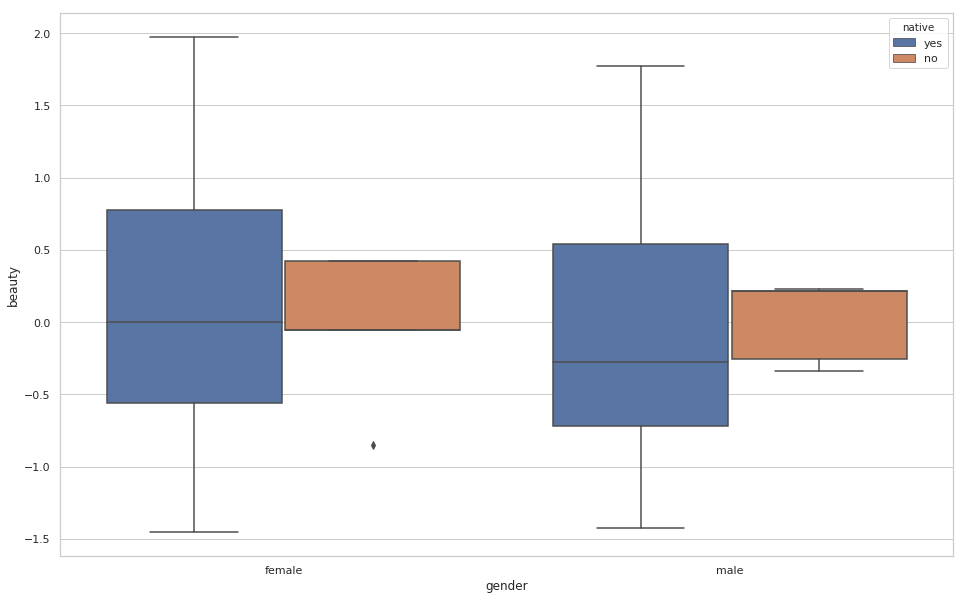

In [201]:
sns.set(style="whitegrid")
sns.boxplot(x = "gender", y = 'beauty', hue = 'native', data = dados_professores)

plt.gcf().set_size_inches(16, 10)